In [4]:
from google.colab import drive
from os.path import join
root = "/content/drive"
print(root)
drive.mount(root)

/content/drive
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns  
import matplotlib.pyplot as plt

# 정제한 데이터들 합치기

- 함친 데이터들 df_all에 저장

In [5]:
import os
df_all = pd.DataFrame()
year = 2020
for k in range(2):
  forders = os.listdir('/content/drive/MyDrive/Meta Data/'+str(year)+'/')
  for i in range(0,len(forders)):
      if forders[i].split('.')[1] == 'csv':
          file = '/content/drive/MyDrive/Meta Data/'+str(year)+'/'+forders[i]
          df= pd.read_csv(file,encoding='utf-8')
         
          df_all = pd.concat([df_all, df],ignore_index=True)
  year+=1
  
print(df_all)



         yyyymmdd  hhnn  stn        lon       lat   uv    band1    band2  \
0        20201101     0   13  126.16000  33.30000  0.0  0.00170  0.00171   
1        20201101     0  105  128.89098  37.75147  0.0  0.00057  0.00114   
2        20201101     0  108  126.96500  37.57100  0.0  0.00113  0.00114   
3        20201101     0  112  126.62490  37.47772  0.0  0.00113  0.00171   
4        20201101     0  115  130.89864  37.48129  0.0  0.00113  0.00057   
...           ...   ...  ...        ...       ...  ...      ...      ...   
1560895  20210930  2350  146  127.11900  35.84080  0.1 -0.00057 -0.00057   
1560896  20210930  2350  152  129.33472  35.58250  0.0 -0.00057  0.00000   
1560897  20210930  2350  156  126.89158  35.17294  0.0 -0.00057 -0.00057   
1560898  20210930  2350  159  129.03203  35.10468  0.0  0.00000  0.00000   
1560899  20210930  2350  165  126.38121  34.81689  0.0  0.00000  0.00000   

           band3    band4  ...     band12     band13     band14     band15  \
0        

# UV와의 상관관계 correlation 보기

In [6]:
df_corr = df_all[df_all.columns[0:]].corr()

In [7]:
df_corr

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateze,esr,height,landtype
yyyymmdd,1.000000e+00,-8.563034e-04,2.583357e-14,2.629009e-13,8.239416e-13,0.003901,-0.005480,-0.005064,-0.003843,-0.003059,...,0.005478,0.006695,0.003662,0.000587,-0.002772,0.003418,-1.357005e-13,-0.003102,3.639303e-14,3.922003e-14
hhnn,-8.563034e-04,1.000000e+00,7.293435e-17,1.225344e-16,5.820363e-16,0.046193,0.045628,0.044930,0.044296,0.046816,...,0.046456,0.041493,0.038986,0.034208,0.024441,-0.127593,-1.246367e-15,0.201452,1.555023e-17,-6.773686e-17
stn,2.583357e-14,7.293435e-17,1.000000e+00,2.226731e-01,1.490523e-01,0.004114,0.002084,0.003292,0.007303,0.013006,...,-0.014808,-0.004065,-0.003393,-0.001463,-0.002559,0.000044,1.433021e-01,-0.000034,-1.386348e-01,3.869078e-01
lon,2.629009e-13,1.225344e-16,2.226731e-01,1.000000e+00,3.026817e-01,0.005142,-0.006473,-0.006908,-0.001790,0.001187,...,-0.025434,-0.006733,-0.007204,-0.006759,-0.015615,0.000106,3.051878e-01,-0.000083,4.137514e-01,2.486516e-01
lat,8.239416e-13,5.820363e-16,1.490523e-01,3.026817e-01,1.000000e+00,-0.019702,-0.008260,-0.009608,-0.006736,-0.003905,...,-0.096965,-0.023795,-0.021349,-0.018744,-0.037837,0.000273,9.998272e-01,-0.000174,2.234999e-01,4.142433e-01
uv,3.901295e-03,4.619317e-02,4.113715e-03,5.142258e-03,-1.970212e-02,1.000000,0.440206,0.420096,0.378186,0.451669,...,0.315373,0.300756,0.285175,0.258397,0.225276,-0.720950,-1.974649e-02,0.696888,2.264348e-04,-4.855481e-03
band1,-5.480052e-03,4.562785e-02,2.083579e-03,-6.473108e-03,-8.259697e-03,0.440206,1.000000,0.998935,0.983771,0.986069,...,-0.155426,-0.201408,-0.206934,-0.216075,-0.212406,-0.720857,-8.364616e-03,0.713225,-5.419730e-03,3.021497e-03
band2,-5.064468e-03,4.492966e-02,3.292001e-03,-6.907597e-03,-9.608071e-03,0.420096,0.998935,1.000000,0.988260,0.988758,...,-0.168439,-0.216142,-0.221424,-0.230003,-0.224547,-0.703271,-9.753102e-03,0.695023,-6.952441e-03,3.704857e-03
band3,-3.842874e-03,4.429552e-02,7.303064e-03,-1.790200e-03,-6.735863e-03,0.378186,0.983771,0.988260,1.000000,0.985385,...,-0.190464,-0.239817,-0.244525,-0.251800,-0.243405,-0.664084,-6.937900e-03,0.654856,-6.886728e-03,9.430368e-03
band4,-3.059430e-03,4.681641e-02,1.300594e-02,1.187418e-03,-3.905320e-03,0.451669,0.986069,0.988758,0.985385,1.000000,...,-0.145644,-0.194255,-0.200561,-0.210364,-0.205996,-0.709940,-4.389647e-03,0.699835,-1.202215e-02,2.371853e-02


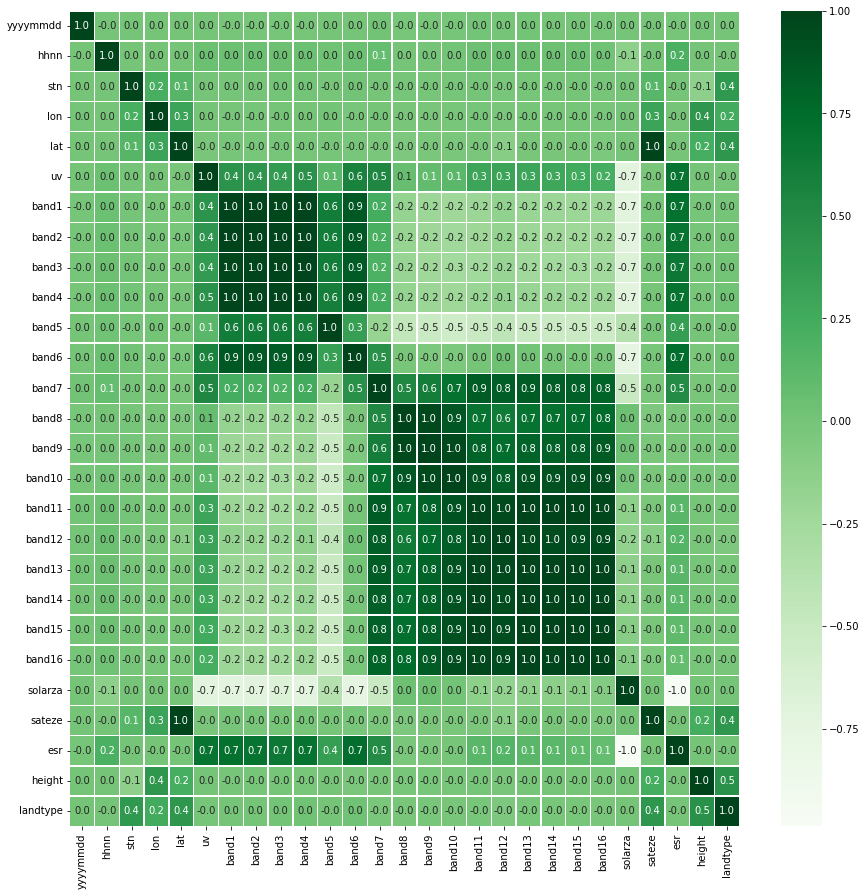

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_corr, annot=True, 
fmt = '.1f', linewidths=.5, cmap='Greens') #data = data.corr()